# Loan Default Prediction Using Decision Trees & Random Forest

# 1. Decision Tree

In [1]:
your_local_path="D:/Python/"

In [2]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
train_df = pd.read_csv(your_local_path+'train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv(your_local_path+'test_loan.csv')


In [3]:
train_df.head() # Checking out Training data frame 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Checking for NaNs
train_df.apply(lambda x: sum(x.isnull()))


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#Handling NaNs
train_df.Gender = train_df.Gender.fillna('Unknown')
train_df.Married = train_df.Married.fillna('Unknown')
train_df.Dependents = train_df.Dependents.fillna('Unknown')
train_df.Self_Employed = train_df.Self_Employed.fillna('Unknown')
#train_df.LoanAmount = train_df.LoanAmount.fillna(train_df.LoanAmount.mean())
#train_df.Loan_Amount_Term = train_df.Loan_Amount_Term.fillna(train_df.Loan_Amount_Term.mean())
train_df.Credit_History = train_df.Credit_History.fillna(2)

#check again for NaNs. LoanAmount and Loan_Amount_Term are still having NaNs which we'll handle using Imputer
train_df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#Conversion from string to numbers
train_df["Gender"] = train_df["Gender"].apply(lambda Gender: 0 if Gender == 'Male' else 
                                              1
                                              if Gender == 'Female' else 2 )

train_df["Property_Area"] = train_df["Property_Area"].apply(lambda Property_Area: 0 if Property_Area == 'Urban' else 1
                                              if Property_Area == 'Semiurban' else 2 )

train_df["Education"] = train_df["Education"].apply(lambda Education: 0 if Education == 'Graduate' else 1
                                              if Education == 'Not Graduate' else 2)


train_df["Self_Employed"] = train_df["Self_Employed"].apply(lambda Self_Employed: 0 if Self_Employed == 'Yes' else 1
                                              if Self_Employed == 'No' else 2 )

train_df["Married"] = train_df["Married"].apply(lambda Married: 0 if Married == 'Yes' else 1
                                              if Married == 'No' else 2 )



replace_dict2 = {'0':'0', '1':'1', '2':'2', '3+':'3', 'Unknown' : '4'}

train_df.Dependents = train_df.Dependents.replace(replace_dict2)
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,NaN,360.0,1.0,0,Y
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,Y
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,Y
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,Y


In [7]:
#Identifying features on which our prediction will depend
y = targets = labels = train_df["Loan_Status"].values

columns = ["Gender","Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", 
           "CoapplicantIncome","LoanAmount", "Loan_Amount_Term","Credit_History", "Property_Area"]
features = train_df[list(columns)].values
features

array([[0, 1, '0', ..., 360.0, 1.0, 0],
       [0, 0, '1', ..., 360.0, 1.0, 2],
       [0, 0, '0', ..., 360.0, 1.0, 0],
       ..., 
       [0, 0, '1', ..., 360.0, 1.0, 0],
       [0, 0, '2', ..., 360.0, 1.0, 0],
       [1, 1, '0', ..., 360.0, 0.0, 1]], dtype=object)

In [8]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(features)
X

array([[   0.,    1.,    0., ...,  360.,    1.,    0.],
       [   0.,    0.,    1., ...,  360.,    1.,    2.],
       [   0.,    0.,    0., ...,  360.,    1.,    0.],
       ..., 
       [   0.,    0.,    1., ...,  360.,    1.,    0.],
       [   0.,    0.,    2., ...,  360.,    1.,    0.],
       [   1.,    1.,    0., ...,  360.,    0.,    1.]])

In [9]:
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=7)
my_tree_one = my_tree_one.fit(X, y) #Building a Decision Tree Classifier from the training set(X,Y)

In [10]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(my_tree_one.feature_importances_) 


[ 0.00981164  0.          0.03737252  0.01910174  0.02464495  0.11839389
  0.15444179  0.13458908  0.0374541   0.44401867  0.02017161]


In [11]:
with open(your_local_path+"loan.dot", 'w') as f:
    f = tree.export_graphviz(my_tree_one, out_file=f, feature_names=columns) 
#goto http://webgraphviz.com/ to visualize the tree.
#Copy paste the content of "loan.dot" doc to Text area and click on Generate Graph.

In [12]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
test_df.apply(lambda x: sum(x.isnull()))


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
#Handling NaNs
test_df.Gender = test_df.Gender.fillna('Unknown')
test_df.Married = test_df.Married.fillna('Unknown')
test_df.Dependents = test_df.Dependents.fillna('Unknown')
test_df.Self_Employed = test_df.Self_Employed.fillna('Unknown')
#test_df.LoanAmount = test_df.LoanAmount.fillna(test_df.LoanAmount.mean())
#test_df.Loan_Amount_Term = test_df.Loan_Amount_Term.fillna(test_df.Loan_Amount_Term.mean())
test_df.Credit_History = test_df.Credit_History.fillna(2)

#check again for NaNs. LoanAmount and Loan_Amount_Term are still having NaNs which we'll handle using Imputer
test_df.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
#Conversion from string to numbers
test_df["Gender"] = test_df["Gender"].apply(lambda Gender: 0 if Gender == 'Male' else 
                                              1
                                              if Gender == 'Female' else 2 )

test_df["Property_Area"] = test_df["Property_Area"].apply(lambda Property_Area: 0 if Property_Area == 'Urban' else 1
                                              if Property_Area == 'Semiurban' else 2 )

test_df["Education"] = test_df["Education"].apply(lambda Education: 0 if Education == 'Graduate' else 1
                                              if Education == 'Not Graduate' else 2)


test_df["Self_Employed"] = test_df["Self_Employed"].apply(lambda Self_Employed: 0 if Self_Employed == 'Yes' else 1
                                              if Self_Employed == 'No' else 2 )

test_df["Married"] = test_df["Married"].apply(lambda Married: 0 if Married == 'Yes' else 1
                                              if Married == 'No' else 2 )



replace_dict2 = {'0':'0', '1':'1', '2':'2', '3+':'3', 'Unknown' : '4'}

test_df.Dependents = test_df.Dependents.replace(replace_dict2)
test_df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,0,0,0,1,5720,0,110.0,360.0,1.0,0
1,LP001022,0,0,1,0,1,3076,1500,126.0,360.0,1.0,0
2,LP001031,0,0,2,0,1,5000,1800,208.0,360.0,1.0,0
3,LP001035,0,0,2,0,1,2340,2546,100.0,360.0,2.0,0
4,LP001051,0,1,0,1,1,3276,0,78.0,360.0,1.0,0


In [16]:
features_test = test_df[list(columns)].values
imp_test = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_test = imp_test.fit_transform(features_test)
X_test

array([[   0.,    0.,    0., ...,  360.,    1.,    0.],
       [   0.,    0.,    1., ...,  360.,    1.,    0.],
       [   0.,    0.,    2., ...,  360.,    1.,    0.],
       ..., 
       [   0.,    1.,    0., ...,  360.,    2.,    1.],
       [   0.,    0.,    0., ...,  360.,    1.,    2.],
       [   0.,    1.,    0., ...,  180.,    1.,    2.]])

In [17]:
pred_test = my_tree_one.predict(X_test)#Loan Status prediction on Test dataset
pred_test
#This is not the final prediction on Test data set..I'll change the Tree depth and see the effect on predition score

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [18]:
#Print the score of the decison tree for which depth is 7 
print(my_tree_one.score(X, y))

0.884364820847


In [19]:
#Print Confusion matrix 
pred = my_tree_one.predict(X)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[126,  66],
       [  5, 417]])

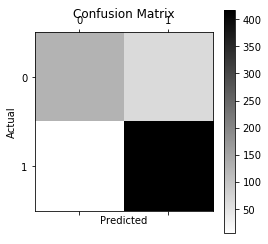

In [20]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [21]:
#Setting "max_depth" to 9 : my_tree_two
my_tree_two = tree.DecisionTreeClassifier(criterion="entropy", max_depth=9)
my_tree_two = my_tree_two.fit(X, y)

#Print the score of the decison tree for which depth is 9
print(my_tree_two.score(X, y))

0.902280130293


In [22]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(my_tree_two.feature_importances_) 


[ 0.00804778  0.          0.03411113  0.02132527  0.01251054  0.17951
  0.15331219  0.1573621   0.03565447  0.36832432  0.02984219]


In [23]:
with open(your_local_path+"loan2.dot", 'w') as f:
    f = tree.export_graphviz(my_tree_two, out_file=f, feature_names=columns) 
#goto http://webgraphviz.com/ to visualize the tree.
#Copy paste the content of "loan2.dot" doc to Text area and click on Generate Graph.

In [24]:
pred_test_dt = my_tree_two.predict(X_test) #Predicting Loan status for test set..
pred_test_dt
#This is the final prediction on test dataset with Decision Tree Algo

array(['Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [25]:
#Test dataset prediction loan id wise using decision tree algo
LoanId = test_df["Loan_ID"]
Test_Pred = pd.DataFrame (pred_test_dt)
Result_dt = pd.concat([LoanId, Test_Pred], names=['Loan_ID', 'Test_Pred'], axis=1)
Result_dt.columns = ['Loan_ID', 'Test_Pred']
Result_dt

,Loan_ID,Test_Pred
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,N
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [26]:
pred_train_dt = my_tree_two.predict(X) #Predicting Loan status for training set which can be compared with actual loan status
pred_train_dt

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [27]:
#Print Confusion matrix again
pred = my_tree_two.predict(X)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[135,  57],
       [  3, 419]])

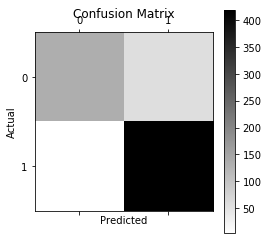

In [28]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [29]:
pred_test_dt = pd.DataFrame(Result_dt).to_csv(your_local_path+'loan_Prediction_Test_DT.csv')
#Loan status for Test data set has been exported to csv


In [30]:
#Comparison of Actual vs  Predicted loan status on Train dataset
actual = train_df["Loan_Status"]
predicted = pd.DataFrame (pred_train_dt)
Compare = pd.concat([actual, predicted], names=['actual', 'predicted'], axis=1)
Compare.columns = ['actual', 'predicted']
Compare

,actual,predicted
0,Y,Y
1,N,Y
2,Y,Y
3,Y,Y
4,Y,Y
5,Y,Y
6,Y,Y
7,N,N
8,Y,Y
9,N,N


# Let's take it forward and implement Random forest

# 2. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth =7 , min_samples_split=2, 
                                n_estimators = 100, random_state = 1)
my_forest1 = forest.fit(X, y)

# Print the score of the fitted random forest
print(my_forest1.score(X, y))

0.843648208469


In [32]:
# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 9, min_samples_split=2, 
                                n_estimators = 100, random_state = 1)
my_forest = forest.fit(X, y)

# Print the score of the fitted random forest
print(my_forest.score(X, y))

0.895765472313


In [33]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(my_forest.feature_importances_) 

[ 0.01833625  0.0231609   0.03798556  0.02107267  0.02303245  0.15548036
  0.10460001  0.14024358  0.0459164   0.38706233  0.04310949]


In [34]:
pred_test_rf = my_forest.predict(X_test)
pred_test_rf
#This is the final prediction on test dataset with Random Forest Algo

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [35]:
#Test dataset prediction loan id wise using Random Forest algo
LoanId = test_df["Loan_ID"]
Test_Pred = pd.DataFrame (pred_test_rf)
Result_rf = pd.concat([LoanId, Test_Pred], names=['Loan_ID', 'Test_Pred'], axis=1)
Result_rf.columns = ['Loan_ID', 'Test_Pred']
Result_rf

,Loan_ID,Test_Pred
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [36]:
pred_train_rf = my_forest.predict(X)  #Predicting Loan status for training set which can be compared with actual loan status
pred_train_rf

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [37]:
pred = my_forest.predict(X)
df_confusion = metrics.confusion_matrix(y, pred)
df_confusion

array([[128,  64],
       [  0, 422]])

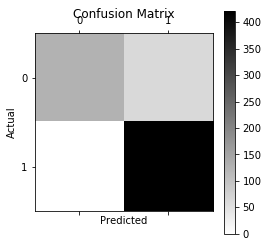

In [38]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)

In [39]:
pred_test_rf = pd.DataFrame(Result_rf).to_csv(your_local_path+'loan_Prediction_Test_RF.csv')

#Loan status for Test data set has been exported to csv

In [40]:
#Comparison of Actual vs  Predicted loan status on Train dataset
actual = train_df["Loan_Status"]
predicted = pd.DataFrame (pred_train_rf)
Compare = pd.concat([actual, predicted], names=['actual', 'predicted'], axis=1)
Compare.columns = ['actual', 'predicted']
Compare

,actual,predicted
0,Y,Y
1,N,Y
2,Y,Y
3,Y,Y
4,Y,Y
5,Y,Y
6,Y,Y
7,N,N
8,Y,Y
9,N,N


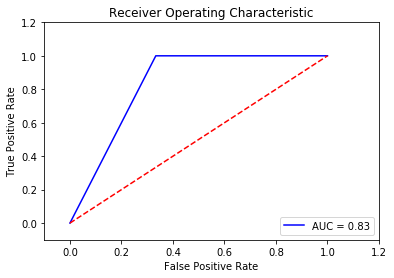

In [41]:
Compare["predicted"]= Compare["predicted"].apply(lambda predicted: 0 if predicted == 'N' else 1 )
Compare["actual"]= Compare["actual"].apply(lambda actual: 0 if actual == 'N' else 1 )

fpr, tpr, _ = metrics.roc_curve(Compare["actual"], Compare["predicted"])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

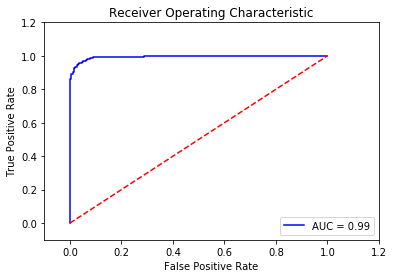

In [42]:
# ROC curve on Predicted probabilities
pred_proba = my_forest.predict_proba(X)
fpr, tpr, _ = metrics.roc_curve(Compare["actual"], pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Overfitting

In [43]:
#Decision Tree is giving 100% accuracy score with depth=22
#Setting "max_depth" to 22 : my_tree_three
my_tree_three = tree.DecisionTreeClassifier(criterion="entropy", max_depth=22)
my_tree_three = my_tree_three.fit(X, y)

#Print the score of the new decison tree for which depth is 22
print(my_tree_three.score(X, y))

1.0


In [44]:
#Random Forest is giving 100% accuracy score with depth=15
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 15, min_samples_split=2, 
                                n_estimators = 100, random_state = 1)
my_forest_two = forest.fit(X, y)

# Print the score of the fitted random forest
print(my_forest_two.score(X, y))

1.0
